In [520]:
import numpy as np
import csv
import re
import matplotlib.pyplot as plt
# from plotDecBoundaries_2 import plotDecBoundaries_2

Import the plotDecBoundaries_2 to this file

In [521]:
################################################
## EE559 HW1, Prof. Jenkins
## Created by Arindam Jati
## Updated by Thanos Rompokos
## Tested in Python 3.9.15
################################################

import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial.distance import cdist

def plotDecBoundaries_2(training, label_train, sample_mean, fsize=(6,4),legend_on = False):
    
    '''
    Plot the decision boundaries and data points for minimum distance to
    class mean classifier
    
    training: traning data, N x d matrix:
        N: number of data points
        d: number of features 
        if d > 2 then the first and second features will be plotted (1st and 2nd column (0 and 1 index));
                 recommended to input an Nx2 dataset with the 2 columns of the features to be plotted
    label_train: class lables correspond to training data, N x 1 array:
        N: number of data points
    sample_mean: mean vector for each class, C x d matrix:
        C: number of classes (up to 5 classes the way the plot symbos are defined)
        each row of the sample_mean matrix is the coordinate of each sample mean
    legend_on: add the legend in the plot. potentially slower for datasets with large number of clases and data points
    '''

    #
    label_train = label_train.astype(int)
    # Total number of classes
    nclass =  len(np.unique(label_train))

    # Set the feature range for ploting
    max_x = np.ceil(max(training[:, 0])) + 1
    min_x = np.floor(min(training[:, 0])) - 1
    max_y = np.ceil(max(training[:, 1])) + 1
    min_y = np.floor(min(training[:, 1])) - 1

    xrange = (min_x, max_x)
    yrange = (min_y, max_y)

    # step size for how finely you want to visualize the decision boundary.
    inc = 0.05

    # generate grid coordinates. this will be the basis of the decision
    # boundary visualization.
    (x, y) = np.meshgrid(np.arange(xrange[0], xrange[1]+inc/100, inc), np.arange(yrange[0], yrange[1]+inc/100, inc))

    # size of the (x, y) image, which will also be the size of the
    # decision boundary image that is used as the plot background.
    image_size = x.shape
    xy = np.hstack( (x.reshape(x.shape[0]*x.shape[1], 1, order='F'), y.reshape(y.shape[0]*y.shape[1], 1, order='F')) ) # make (x,y) pairs as a bunch of row vectors.

    # distance measure evaluations for each (x,y) pair.
    dist_mat = cdist(xy, sample_mean)
    pred_label = np.argmin(dist_mat, axis=1)

    # reshape the idx (which contains the class label) into an image.
    decisionmap = pred_label.reshape(image_size, order='F')

    # documemtation: https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
    symbols_ar = np.array(['rx', 'bo', 'ms', 'cd','gp','y*','kx','gP','r+','bh'])
    mean_symbol_ar = np.array(['rd', 'bd', 'md', 'cd','gd','yd','kd','gd','rd','bd'])
    markerfacecolor_ar = np.array(['r', 'b', 'm', 'c','g','y','k','g','r','b'])
    #show the image, give each coordinate a color according to its class label
    plt.figure(figsize=fsize)

    plt.imshow(decisionmap, extent=[xrange[0], xrange[1], yrange[0], yrange[1]], origin='lower', aspect='auto')

    # plot the class training data.
    plot_index = 0
    class_list = []
    class_list_name = [] #for legend
    mean_list = [] # for legend
    mean_lis_name = [] # for legend
    for cur_label in np.unique(label_train):
        # print(cur_label,plot_index,np.sum(label_train == cur_label))
        d1, = plt.plot(training[label_train == cur_label, 0],training[label_train == cur_label, 1], symbols_ar[plot_index])

        if legend_on:
            class_list.append(d1)
            class_list_name.append('Class '+str(plot_index))
            l = plt.legend(class_list,class_list_name, loc=2)
            plt.gca().add_artist(l)

        # plot the class mean vector.
        m1, = plt.plot(sample_mean[cur_label,0], sample_mean[cur_label,1], mean_symbol_ar[plot_index], markersize=12, markerfacecolor=markerfacecolor_ar[plot_index], markeredgecolor='w')
        # include legend for class mean vector
        if legend_on:
            mean_list.append(m1)
            mean_lis_name.append('Class '+str(plot_index)+' mean')
            l1 = plt.legend(mean_list,mean_lis_name, loc=4)
            plt.gca().add_artist(l1)
       
        plot_index = plot_index + 1

    plt.show()

In [643]:
def getData(fname, feature):
    '''
    fname: file name
    feature: the count of feature
    '''
    with open(fname, mode ='r')as file:
        # reading the CSV file
        csvFile = csv.reader(file)
        
        # create a new array to store the data
        data = np.empty([0,feature])
        labels = []

        value = re.compile(r'^[-+]?[0-9]+.[0-9]+$')
        
        # collect the contents of the CSV file
        for lines in csvFile:
            if not value.match(lines[0]):
                continue;
        
            newData = []
            for item in lines:
                newData.append(float(item))
            data = np.row_stack((data, newData[:feature]))
            labels.append(newData[feature])
    
    labels = np.asarray(labels)
    N = len(data)
    
    return (data, labels, N)

In [582]:
def getMean(data, labels, classNum, feature):
    '''
    data: data from csv
    labels: actual labels
    classNum: the count of classes
    '''
    dataClassNum = np.empty([0,feature])
    
    for i in range(len(data)):
        if(labels[i] == classNum):
            dataClassNum = np.row_stack((dataClassNum, data[i]))
    return np.mean(dataClassNum, axis=0)

In [642]:
FEATURE = 7
CLASSES = 5
dataTrain, labelsTrain, N = getData('HW2_train_set.csv', FEATURE)
sample_means_train = np.empty((0,FEATURE))

for i in range(CLASSES):
    classMean = getMean(dataTrain, labelsTrain, i, FEATURE)
    sample_means_train = np.row_stack((sample_means_train, classMean))

In [525]:
def C_classes_nearest_mean_plot(data, labels, featureNum1, featureNum2, sample_means):
    plotDecBoundaries_2(np.asarray(data)[:, [featureNum1,featureNum2]], labels, np.asarray(sample_means)[:, [featureNum1,featureNum2]], fsize=(10,10),legend_on = True)    

In [644]:
dataTest, labelsTest, N_test = getData('HW2_test_set.csv', FEATURE)

In [653]:
def C_classes_nearest(data, labels, sample_means):
    distanceArr = np.empty((0, len(sample_means)))
    
    for i in range(len(data)):
        distanceList = []
        for r in range(len(sample_means)):
            square = np.square(data[i] - sample_means[r])
            sumSquare = np.sum(square)
            distance = np.sqrt(sumSquare)
            distanceList.append(distance)
        
#         print(distanceList)
        distanceArr = np.row_stack((distanceArr, np.asarray(distanceList)))
    N_accurate = 0
    for i in range(len(distanceArr)):
#         print(min(distanceArr[i]))
        if(distanceArr[i][0] == min(distanceArr[i]) and labels[i] == 0.):
            N_accurate += 1
        elif(distanceArr[i][1] == min(distanceArr[i]) and labels[i] == 1.):
            N_accurate += 1
        elif(distanceArr[i][2] == min(distanceArr[i]) and labels[i] == 2.):
            N_accurate += 1
        elif(distanceArr[i][3] == min(distanceArr[i]) and labels[i] == 3.):
            N_accurate += 1
        elif(distanceArr[i][4] == min(distanceArr[i]) and labels[i] == 4.):
            N_accurate += 1
    
    accuracy =( N_accurate ) / len(data) * 100
    print(f'Accuracy = {accuracy : 0.3f}%')
            
    
C_classes_nearest(dataTrain, labelsTrain, sample_means_train)        
C_classes_nearest(dataTest, labelsTest, sample_means_train)        

Accuracy =  85.238%
Accuracy =  82.444%


In [654]:
def C_classes_nearest_mean_error(data, label, N, featureNum1, featureNum2):
    # sample mean (4 * 2)
    sample_means = sample_means_train
    
    distanceArr = np.empty((0, len(sample_means)))
    for i in range(len(data)):
        distanceList = []
        for r in range(len(sample_means)):
            square = np.square(data[i,[featureNum1,featureNum2]] - sample_means[r,[featureNum1,featureNum2]])
            sumSquare = np.sum(square)
            distance = np.sqrt(sumSquare)
            distanceList.append(distance)
        
        distanceArr = np.row_stack((distanceArr, np.asarray(distanceList)))
    
    N_accurate = 0
    for i in range(len(distanceArr)):
        if(distanceArr[i][0] == min(distanceArr[i]) and label[i] == 0.):
            N_accurate += 1
        elif(distanceArr[i][1] == min(distanceArr[i]) and label[i] == 1.):
            N_accurate += 1
        elif(distanceArr[i][2] == min(distanceArr[i]) and label[i] == 2.):
            N_accurate += 1
        elif(distanceArr[i][3] == min(distanceArr[i]) and label[i] == 3.):
            N_accurate += 1
            
        elif(distanceArr[i][4] == min(distanceArr[i]) and label[i] == 4.):
            N_accurate += 1
    
    accuracy =( N_accurate ) / N * 100
    print(f'Accuracy = {accuracy : 0.3f}%')
    
    C_classes_nearest_mean_plot(data, label, featureNum1, featureNum2,sample_means_train )
    
    

Accuracy =  50.857%


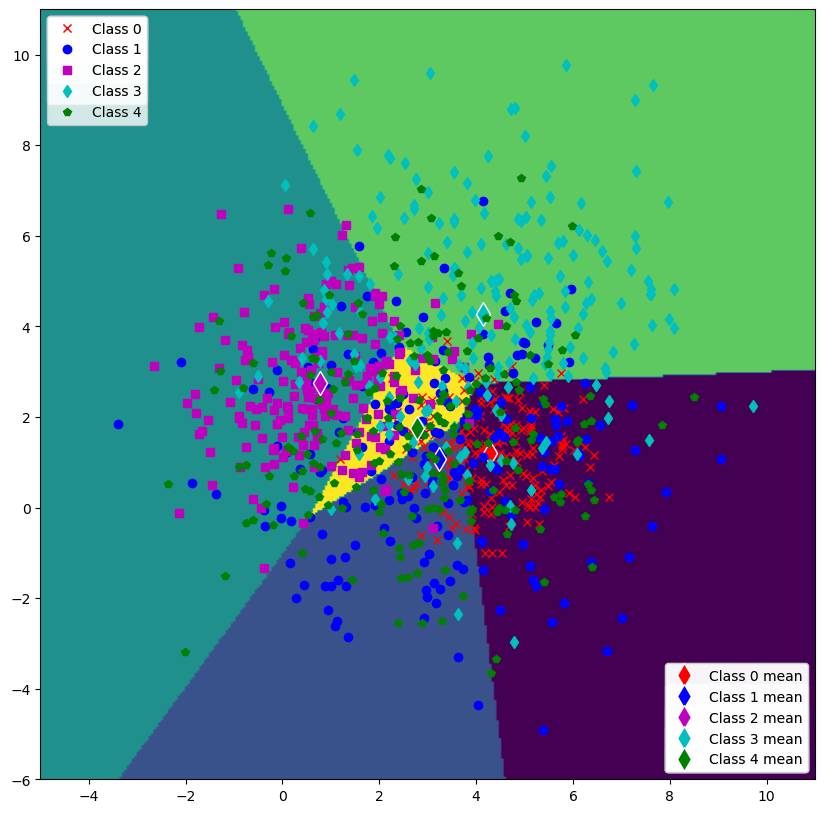

In [655]:
C_classes_nearest_mean_error(dataTrain, labelsTrain, N, 0, 1)

Accuracy =  48.000%


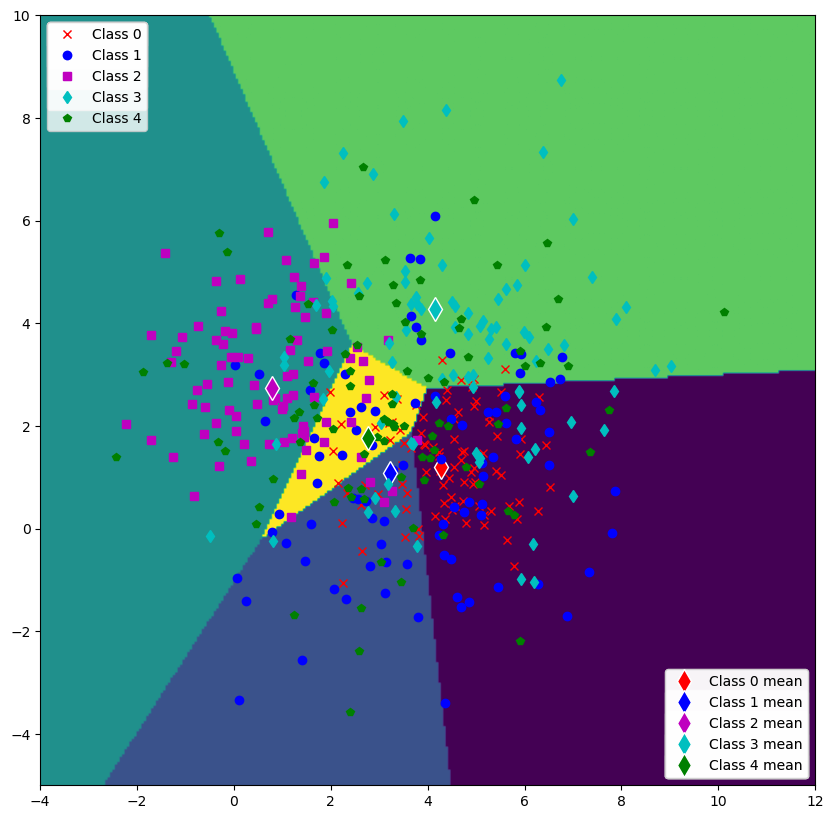

In [656]:
C_classes_nearest_mean_error(dataTest, labelsTest, N_test, 0, 1)

Accuracy =  60.952%


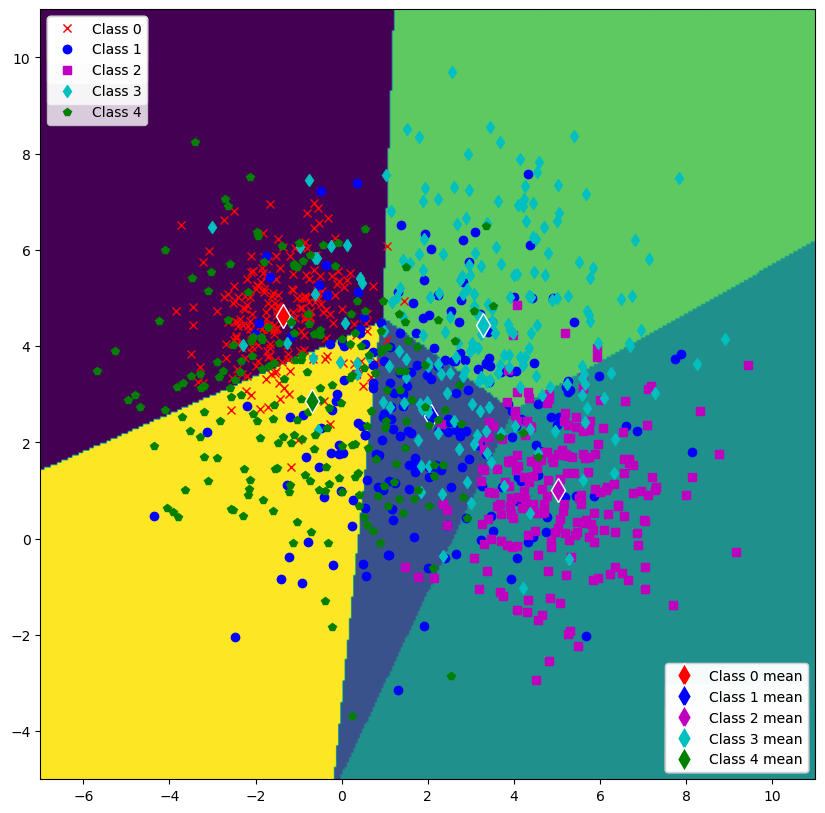

In [657]:
C_classes_nearest_mean_error(dataTrain, labelsTrain, N, 2, 3)

Accuracy =  60.444%


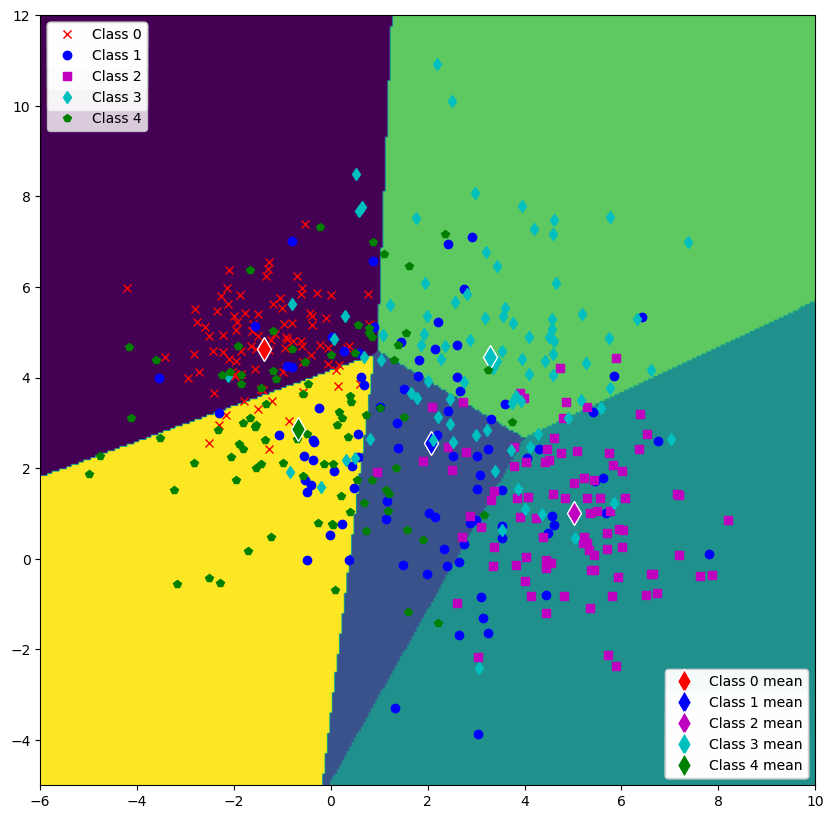

In [658]:
C_classes_nearest_mean_error(dataTest, labelsTest, N_test, 2, 3)

Accuracy =  67.619%


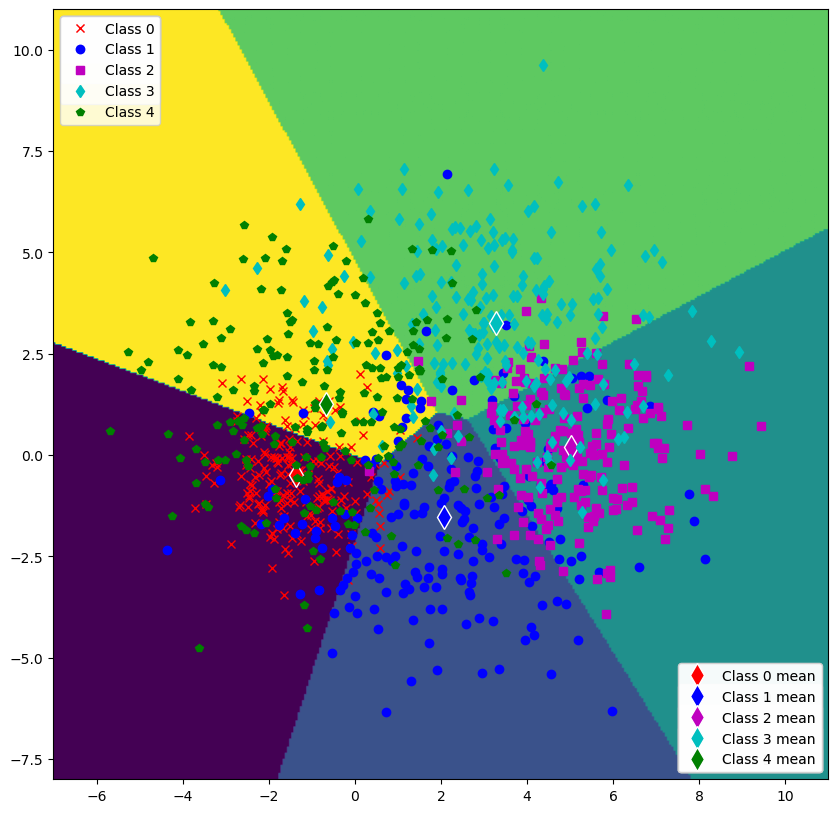

In [659]:
C_classes_nearest_mean_error(dataTrain, labelsTrain, N, 2, 6)

Accuracy =  63.778%


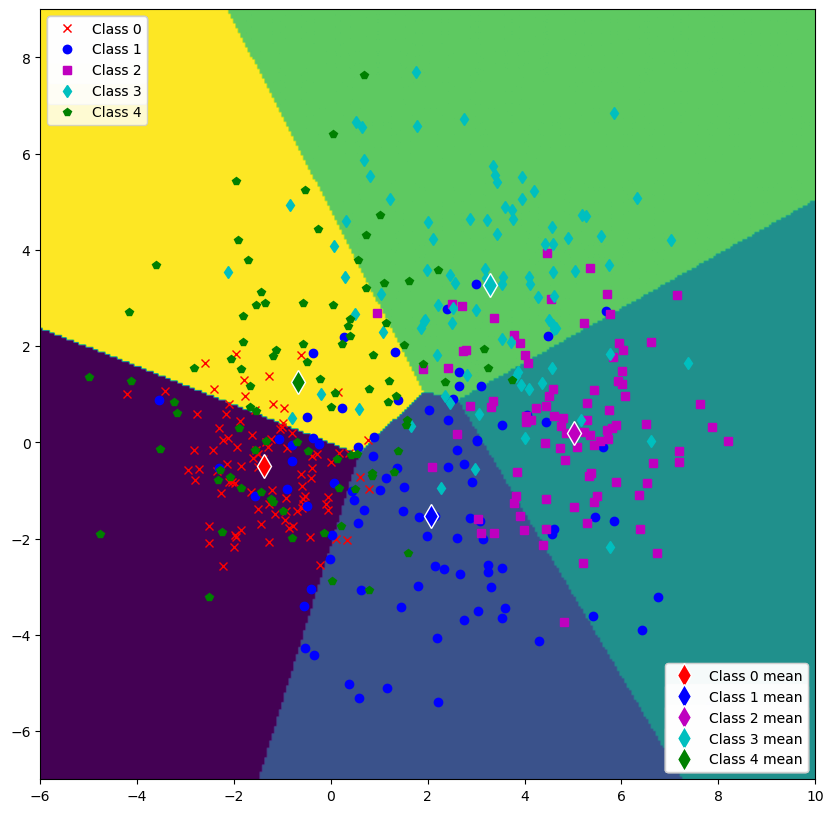

In [660]:
C_classes_nearest_mean_error(dataTest, labelsTest, N_test, 2, 6)